# **Final Project Report**

Analysis Domain:
* Finance

Collaborators:
* Niranjan Cholendiran
* Santhosh Pattamudu Manoharan
* Saaijeesh Sottalu Naresh
* Makayla Johnson



# **Introduction**

In today's highly competitive business landscape, companies face the ongoing challenge of strategically allocating their marketing budgets across various advertising channels to drive sales and achieve a substantial return on investment. This report delves into the heart of this challenge and presents a comprehensive solution leveraging the power of "Market Mix Modeling" (MMM).

# **Data Source**

For this project, we have used a sample dataset provided by Robyn, an open-source MMM package developed by Meta Marketing Science. This dataset comprises 208 weeks' worth of sales data, offering a deep insight into the dynamics of an organization's revenue generation.

This dataset consists:

1. The allocation of financial resources across five advertising channels: TV, Print, Out-Of-Home advertising, Facebook, and Search.
2. Metrics related to media exposure, encompassing impressions and clicks, for two of the most influential media channels: Facebook and Search.
3. The role of organic media without monetary investment, such as newsletters.
4. External factors influencing sales, including events, holidays, and the performance of competitors.

Source Bias:

We would like to note that we are only working with one data set, these results will be sepcific to this company, for more generalized results we should try to incorperate more datasets from a diverse set of companies

# **Problem Statement**

What is the optimal ratio for allocating advertising funds across these diverse media channels, to achieve the goal of maximizing future sales?

# **Solution**

To solve this problem, we have breifly taken the following approach to solve this problem:
1. Identidied the key advertising channels that exerts the most significant influence on sales.
2. Constructed a regression model using the historical media spending data in these influential channels alongside the corresponding sales outcomes.
3. Applied the insights gleaned from the model's $\beta$ coefficients to identify the most advantageous budget allocation strategy.

In the sections that follow, we provide a detailed account of our approach, methodology, findings, and recommendations.

In [ ]:
#Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 1. Data Pre-processing

In [ ]:
#Read the csv file
df=pd.read_csv("Robyn_dt_simulated_weekly.csv")
df.sample(5)

,Unnamed: 0,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
44,45,2016-09-26,1.895213e+06,0.0,304454,0.000000,0.000000e+00,22420.118150,22300,6168548,0.000000,na,2886.000000
67,68,2017-03-06,1.477865e+06,0.0,0,105208.333333,0.000000e+00,46462.993211,35000,4688746,0.000000,na,12272.000000
175,176,2019-04-01,1.209373e+06,0.0,0,0.000000,3.549412e+07,73888.386526,59100,4017170,99259.663471,na,7453.000000
130,131,2018-05-21,2.601602e+06,7103.3,49291,0.000000,0.000000e+00,0.000000,0,3080867,0.000000,event1,19401.653846
13,14,2016-02-22,1.507805e+06,0.0,0,0.000000,0.000000e+00,0.000000,0,5027123,0.000000,na,19401.653846


In [ ]:
# Lower the column headings to maintain a consitent format
df.columns= df.columns.str.lower()

Our objective is to only estimate media spends to achieve the revenue goal, so select only the media spend columns.

In [ ]:
df_selected= df[['date','tv_s','ooh_s','print_s','search_s','facebook_s','revenue']]
df_selected.head()

,date,tv_s,ooh_s,print_s,search_s,facebook_s,revenue
0,2015-11-23,167687.6,0,95463.666667,0,228213.987444,2.754372e+06
1,2015-11-30,214600.9,0,0.000000,31000,34258.573511,2.584277e+06
2,2015-12-07,0.0,248022,3404.000000,28400,127691.261335,2.547387e+06
3,2015-12-14,625877.3,0,132600.000000,31900,84014.720306,2.875220e+06
4,2015-12-21,0.0,520005,0.000000,27100,20687.478156,2.215953e+06


In [ ]:
# Check for null values in the features

df_selected.isnull().any()

date          False
tv_s          False
ooh_s         False
print_s       False
search_s      False
facebook_s    False
revenue       False
dtype: bool

The dataset does not have any null entires

# 02. Data Exploration (WIP)

<ipython-input-34-ae0feae6ece2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_selected.corr(), annot=True, cmap='Greens')


<Axes: >

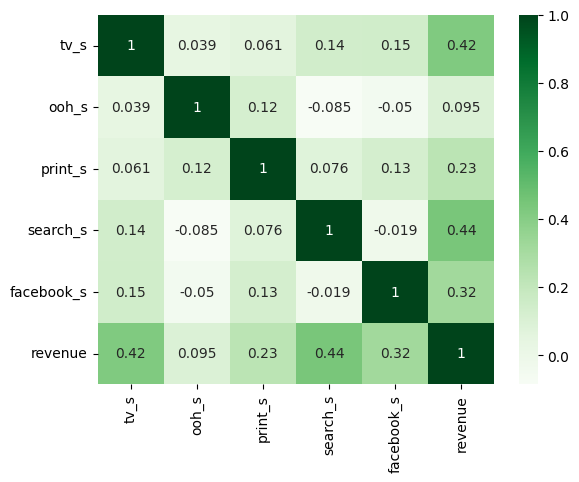

In [ ]:
# Check the relationship (correlation) between the columns

sns.heatmap(df_selected.corr(), annot=True, cmap='Greens')

* Spends in TV and Search channels have high impact (correlation) on revenue
* Out Of Home (OOH) advertising spends have the lowest impact on the revenue

In [ ]:
# Drop the low correated column

df_corr= df_selected.drop(columns=['ooh_s'])
df_corr.head()

,date,tv_s,print_s,search_s,facebook_s,revenue
0,2015-11-23,167687.6,95463.666667,0,228213.987444,2.754372e+06
1,2015-11-30,214600.9,0.000000,31000,34258.573511,2.584277e+06
2,2015-12-07,0.0,3404.000000,28400,127691.261335,2.547387e+06
3,2015-12-14,625877.3,132600.000000,31900,84014.720306,2.875220e+06
4,2015-12-21,0.0,0.000000,27100,20687.478156,2.215953e+06


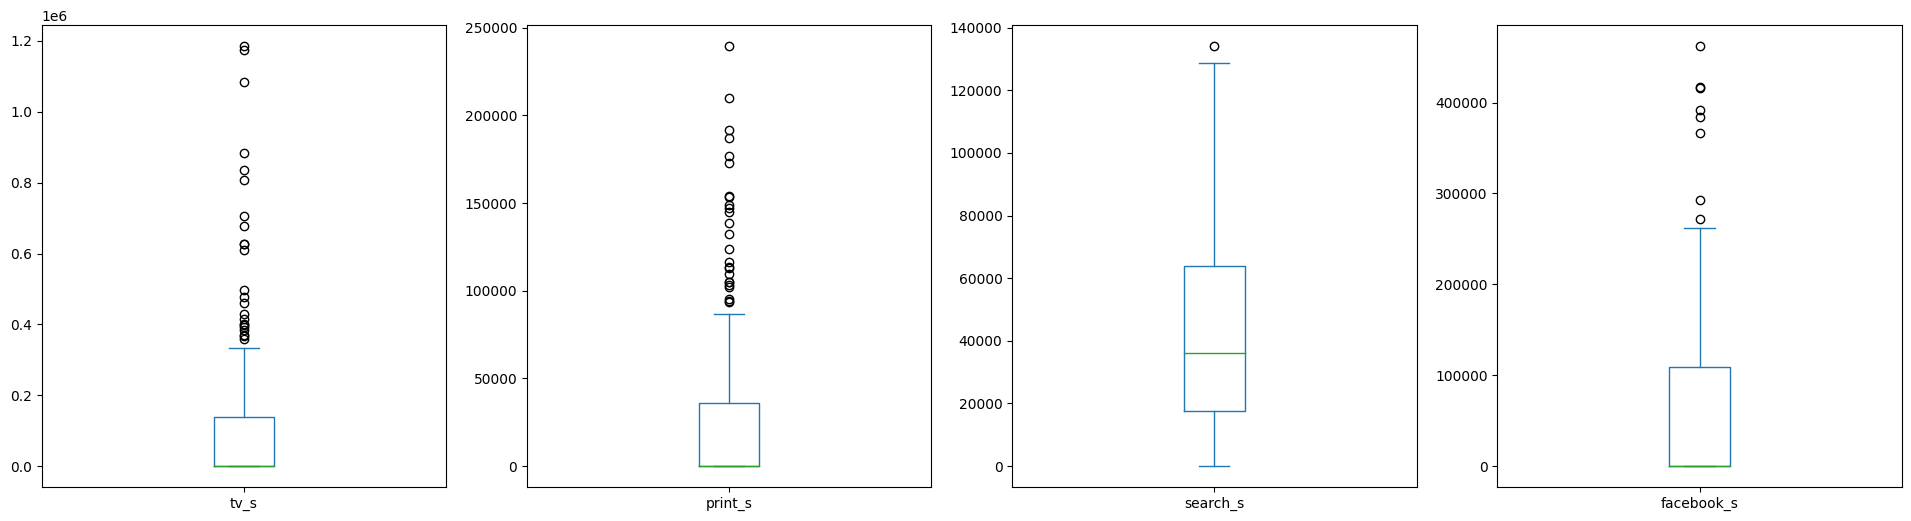

In [ ]:
fig, ax = plt.subplots(figsize=(24,6), ncols=4)
data_1 = df_corr['tv_s'].plot.box(ax=ax[0])
data_2 = df_corr['print_s'].plot.box(ax=ax[1])
data_3 = df_corr['search_s'].plot.box(ax=ax[2])
data_4 = df_corr['facebook_s'].plot.box(ax=ax[3])

# show plot
plt.show()

In [ ]:
df_corr.describe()

,tv_s,print_s,search_s,facebook_s,revenue
count,2.080000e+02,208.000000,208.000000,208.000000,2.080000e+02
mean,1.113277e+05,27964.741987,44366.346154,64369.734789,1.822143e+06
std,2.141877e+05,48623.026738,35268.769589,94810.914100,7.162286e+05
min,0.000000e+00,0.000000,0.000000,0.000000,6.722500e+05
25%,0.000000e+00,0.000000,17650.000000,0.000000,1.165211e+06
50%,0.000000e+00,0.000000,36050.000000,0.000000,1.874514e+06
75%,1.380503e+05,35758.750000,64025.000000,108690.366986,2.378407e+06
max,1.185349e+06,239417.333333,134100.000000,462011.742240,3.827520e+06


(array([35., 29., 27., 19., 35., 27., 24.,  7.,  3.,  2.]),
 array([ 672250.,  987777., 1303304., 1618831., 1934358., 2249885.,
        2565412., 2880939., 3196466., 3511993., 3827520.]),
 <BarContainer object of 10 artists>)

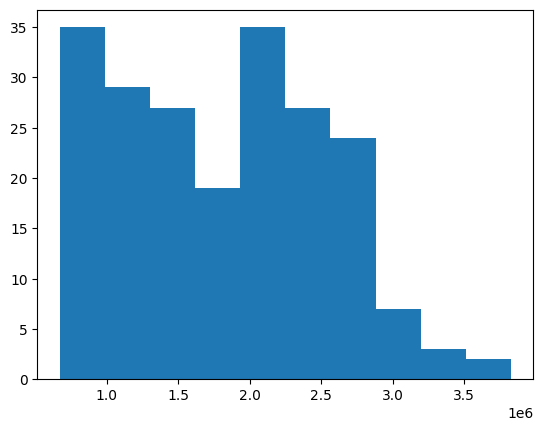

In [ ]:
plt.hist(df_corr['revenue'])

# 03. Modelling

In [ ]:
# Order the data by date

df_corr.sort_values('date',inplace= True)

In [ ]:
# Drop the date column as it is not considered as an influencial variable in this analysis

df_corr.drop(columns=['date'],inplace=True)
df_corr.head()

,tv_s,print_s,search_s,facebook_s,revenue
0,167687.6,95463.666667,0,228213.987444,2.754372e+06
1,214600.9,0.000000,31000,34258.573511,2.584277e+06
2,0.0,3404.000000,28400,127691.261335,2.547387e+06
3,625877.3,132600.000000,31900,84014.720306,2.875220e+06
4,0.0,0.000000,27100,20687.478156,2.215953e+06


In [ ]:
# Normalize the values to ensure all features contribute equally

scaler=preprocessing.MinMaxScaler()
scaled=scaler.fit_transform(df_corr)

df_norm=pd.DataFrame(scaled, columns= df_corr.columns)
df_norm.describe()

,tv_s,print_s,search_s,facebook_s,revenue
count,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.093920,0.116803,0.330845,0.139325,0.364436
std,0.180696,0.203089,0.263004,0.205213,0.226994
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.131618,0.000000,0.156234
50%,0.000000,0.000000,0.268829,0.000000,0.381034
75%,0.116464,0.149357,0.477442,0.235255,0.540733
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Split the train data as the initial 70% of the weeks and use the remaining 30% for testing

total_rows= len(df_norm)
num_train_rows= int(70*total_rows/100)
input_col_num= df_norm.shape[1]-1

df_train_x= df_norm.iloc[1:num_train_rows,:input_col_num]
df_train_y= df_norm.iloc[1:num_train_rows,input_col_num:]
df_test_x= df_norm.iloc[num_train_rows:,:input_col_num]
df_test_y= df_norm.iloc[num_train_rows:,input_col_num:]

print("Training input shape:",df_train_x.shape)
print("Training output shape:",df_train_y.shape)
print("Testing input shape:",df_test_x.shape)
print("Testing output shape:",df_test_y.shape)

Training input shape: (144, 4)
Training output shape: (144, 1)
Testing input shape: (63, 4)
Testing output shape: (63, 1)


In [ ]:
# Train the regression model and evaluate it

ridge_model = Ridge(alpha=3.0)
ridge_model.fit(df_train_x, df_train_y)
y_pred= ridge_model.predict(df_test_x)
mse_rr = mean_squared_error(df_test_y, y_pred)
r2_rr = r2_score(df_test_y, y_pred)

print("MSE:",mse_rr)
print("R2 score:", r2_rr)

MSE: 0.029271448508340094
R2 score: 0.41148076043421267


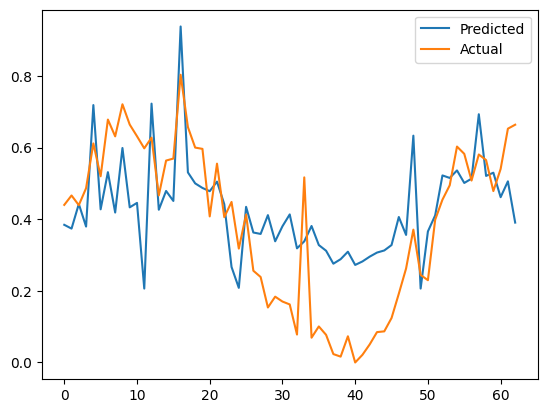

In [ ]:
# Compare the prdicted values with the actual sales in a plot

plt.plot(y_pred, label= 'Predicted')
plt.plot(np.array(df_test_y['revenue']), label= 'Actual')
plt.legend()

The predicted result has an $R^2$ score of 0.41.

The model has captured the overall trend, however, it has to be improved to get more accurate results

# 04. Conclusion

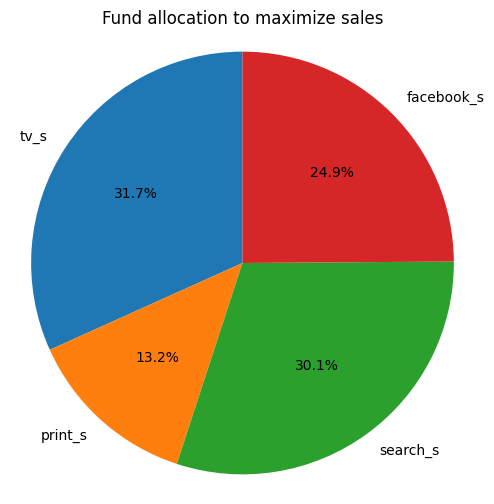

In [ ]:
# Print the training results and parameters

coefficients=ridge_model.coef_[0]

labels = df_train_x.columns
sizes = coefficients # Sizes or proportions for each category

plt.figure(figsize=(6, 6))  # Optional: Set the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Fund allocation to maximize sales')

# Show the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The company should allocate their advertising funds in the above mentioned ratio to maximize their future sales.
-------------

# **Recommended Next Steps**

Here are a few next steps recommendation to improve the accuracy of the model:

1. **Incorporate Intermediate Metrics**: Include additional intermediate metrics such as impressions and clicks in the analysis. This will provide a more comprehensive view of the advertising campaign's effectiveness. Understanding not only sales but also the reach and response of the advertisements can lead to more informed decision-making.

2. **Account for Non-Linearity**: Explore the impact of factors like seasonality, carryover effect, and saturation effects in the model as the relationship between ad spends and sales may not always be linear.

3. **Experiment with Regression Techniques**: Diversify the approach by trying different regression techniques and incorporating hyperparameter tuning. This experimentation can help to identify the most suitable modeling method for this specific data and objectives, potentially leading to improved predictive performance.